In [1]:
import pickle
from Posterior import Posterior
from Util import creation_data, plot_confront
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
theta_true = 0.05
cfg = {'n_particles': 100, 'theta_eff': 0.5*theta_true, 'sourcespace': None, 'data': None,
       'n_bins': 50, 'sequence_evolution': None, 'method': None, 'verbose': False}
sns.set_style('darkgrid')
verbose = False

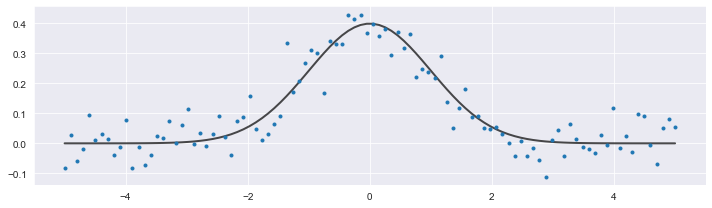

In [8]:
cfg['sourcespace'], cfg['data'] = creation_data(n_data=100, theta=theta_true)
with open('data/data.pkl', 'wb') as f:
    pickle.dump([cfg['sourcespace'], cfg['data'], theta_true], f)
plt.figure(figsize=(10,3))
plt.plot(cfg['sourcespace'], stats.norm.pdf(cfg['sourcespace'], 0, 1), 'k', linewidth=2, alpha=0.7)
plt.plot(cfg['sourcespace'], cfg['data'], '.')
plt.tight_layout()
#plt.savefig('fig/data.png', dpi=1000)
plt.show()

RUN PROPOSED

In [4]:
cfg['method']='PM'
post_pm = Posterior(cfg=cfg)
post_pm = post_pm.perform_smc()
with open(f'sol/sol_pm.pkl', 'wb') as f:
    pickle.dump(post_pm, f)

number of particles set at: 100
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False


/Users/ale/Documents/phd/toy_example/Particle.py:76: RuntimeWarning: invalid value encountered in double_scalars
  rapp_like = part_aux.like / self.like
/Users/ale/Documents/phd/toy_example/Particle.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  rapp_like = part_aux.like / self.like
/Users/ale/Documents/phd/toy_example/Particle.py:78: RuntimeWarning: invalid value encountered in double_scalars
  if np.random.rand() < min([rapp_prior * rapp_like * rapp_proposal, 1]):


RUN FULLY BAYESIAN

In [5]:
cfg['method']='FB'
post_fb = Posterior(cfg=cfg)
post_fb = post_fb.perform_smc()
with open(f'sol/sol_fb.pkl', 'wb') as f:
    pickle.dump(post_fb, f)

number of particles set at: 100
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: FB
verbose: False


/Users/ale/Documents/phd/toy_example/Particle.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  rapp_like = part_aux.like / self.like
/Users/ale/Documents/phd/toy_example/Particle.py:94: RuntimeWarning: invalid value encountered in double_scalars
  rapp_like = part_aux.like / self.like


RUN EXPECTATION MAXIMIZATION

In [6]:
cfg['method']='EM'
post_em = Posterior(cfg=cfg)
post_em = post_em.perform_smc()
with open(f'sol/sol_em.pkl', 'wb') as f:
    pickle.dump(post_em, f)

number of particles set at: 100
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: EM
verbose: False


LOADING SOLUTIONS

In [7]:
with open(f'sol/sol_pm.pkl', 'rb') as f:
    post_pm = pickle.load(f)
with open(f'sol/sol_fb.pkl', 'rb') as f:
    post_fb = pickle.load(f)
with open(f'sol/sol_em.pkl', 'rb') as f:
    post_em = pickle.load(f)

PRINT ESTIMATES

In [8]:
print(r'PROP $\theta$')
print(f'MAP: {post_pm.map_theta} -- PM: {post_pm.pm_theta}')
print(r'CLAS $\theta$')
print(f'MAP: {post_fb.map_theta} -- PM: {post_fb.pm_theta}')
print(r'EM $\theta$')
print(f'MAP: {post_em.map_theta} -- PM: {post_em.pm_theta}')
print('PROP mean')
print(f'MAP: {post_pm.map_mean} -- PM: {post_pm.pm_mean}')
print('CLAS mean')
print(f'MAP: {post_fb.map_mean} -- PM: {post_fb.pm_mean}')
print('EM mean')
print(f'MAP: {post_em.map_mean} -- PM: {post_em.pm_mean}')

PROP $\theta$
MAP: 0.009936776550279863 -- PM: 0.010610172268725184
CLAS $\theta$
MAP: 0.01070247109234937 -- PM: 0.010175905792825212
EM $\theta$
MAP: 0.010454545454545456 -- PM: 0.010565677270616957
PROP mean
MAP: 0.01274785314320237 -- PM: -2.2204049449459224e-90
CLAS mean
MAP: -0.020098179061877247 -- PM: -0.021050383896848334
EM mean
MAP: -0.031864775809123835 -- PM: -0.025532488149021884


PLOT PARAMETERS AND CONFRONT

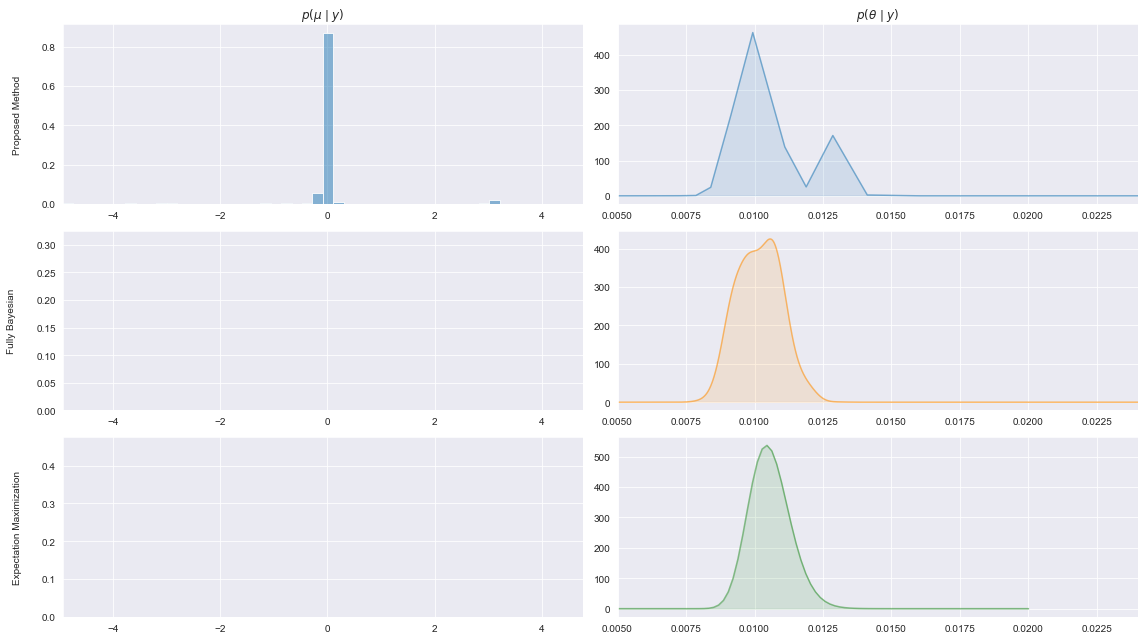

In [9]:
plot_confront(post_pm, post_fb, post_em)